![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
df = pd.read_csv("datos/alas_del_mundo.csv")

In [3]:
df.sample(5)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
119429,816122,Ontario,Toronto,Female,Bachelor,75990.0,Nova,3238.00,Standard,2017,9,2017,6,0,0,0.00
285619,235885,Quebec,Tremblant,Female,Bachelor,53337.0,Star,2727.08,Standard,2014,12,2018,8,9,3681,368.00
190694,912588,British Columbia,West Vancouver,Male,College,NaN,Nova,7799.44,Standard,2013,4,2018,3,3,1518,188.75
273080,387214,Ontario,Toronto,Female,Bachelor,74964.0,Star,4362.93,2018 Promotion,2018,2,2017,9,0,0,0.00
197175,952244,British Columbia,Vancouver,Male,Bachelor,61253.0,Nova,8346.02,Standard,2018,11,2018,4,0,0,0.00


Vamos a comprobar primero si hay filas completas nulas o filas enteras duplicadas.

In [4]:
df.isna().all(axis=1).sum()

0

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1864


No tenemos filas completas nulas, pero sí tenemos filas enteras duplicadas. Éstas pueden ser descartadas ya que no nos dan ninguna información útil.

Ahora comprobemos nulos por columna. Para ello vamos a hacer un resumen rápido usando .info().

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      403760 non-null  int64  
 1   Province            403760 non-null  object 
 2   City                403760 non-null  object 
 3   Gender              403760 non-null  object 
 4   Education           403760 non-null  object 
 5   Salary              301500 non-null  float64
 6   Loyalty Card        403760 non-null  object 
 7   CLV                 403760 non-null  float64
 8   Enrollment Type     403760 non-null  object 
 9   Enrollment Year     403760 non-null  int64  
 10  Enrollment Month    403760 non-null  int64  
 11  Year                403760 non-null  int64  
 12  Month               403760 non-null  int64  
 13  Flights Booked      403760 non-null  int64  
 14  Distance            403760 non-null  int64  
 15  Points Accumulated  403760 non-null  fl

Vemos que tenemos nulos únicamente en la columna de salarios, y además bastantes. Lo siguiente será ver la procedencia de estos nulos y tomar una decisión de cómo tratarlos.

In [7]:
df[df["Salary"].isna()].sample(5)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
26655,256945,Manitoba,Winnipeg,Female,College,NaN,Aurora,5331.82,Standard,2014,1,2018,4,0,0,0.0
179150,963642,New Brunswick,Moncton,Male,College,NaN,Nova,6778.84,Standard,2016,8,2018,5,5,2392,239.0
274210,478278,British Columbia,Vancouver,Male,College,NaN,Star,2606.05,Standard,2013,8,2017,12,3,3456,345.0
283159,282532,Quebec,Montreal,Female,College,NaN,Star,2703.27,Standard,2018,6,2017,8,0,0,0.0
238977,365346,Quebec,Montreal,Female,College,NaN,Star,1898.01,Standard,2015,5,2017,10,0,0,0.0


In [8]:
df[df["Salary"].isna()]["Education"].unique()

array(['College'], dtype=object)

In [9]:
df[df["Education"] == "College"]["Salary"].unique()

array([nan])

In [10]:
df["Salary"].isna().sum()/df.shape[0]

0.2532692688725976

Averiguamos que realmente los nulos de los salarios corrersponden a todos aquellos clientes que tienen un nivel educativo de College. La opción de eliminarlos no sería viable, ya que perdemos muchísimos datos (en torno a un 25% de ellos), por lo que podemos optar por imputarlos con los valores medios generales de los salarios de todo nuestro conjunto de datos. 

Antes de eso, vamos a tratar con otro problema que nos encontramos: salarios negativos.

In [11]:
(df["Salary"]<0).sum()

480

Tenemos 480 negativos. Éstos no representan un porcentaje significante en nuestro conjunto, pero vamos a tratar de averiguar su origen.

In [12]:
df[df["Salary"]<0].groupby(["Loyalty Number"])["Salary"].count()

Loyalty Number
115505    24
152016    24
194065    24
212128    24
232755    24
239955    24
347013    24
364596    24
366599    24
430398    24
436087    24
491242    24
525245    24
542976    24
603070    24
729561    24
734647    24
790475    24
906428    24
959977    24
Name: Salary, dtype: int64

Vemos que los datos vienen de 24 registros por cliente de unos 20 clientes. Ya que los registros se hacen mensualmente, estos son errores que surgieron durante los 2 años de los registros. 

Veamos algunos datos más que puedan darnos más información sobre el origen de estos datos.

In [13]:
print(f'Enrollment Types: {df[df["Salary"]<0]["Enrollment Type"].unique()}')
print(f'Education Levels: {df[df["Salary"]<0]["Education"].unique()}')
print(f'Province: {df[df["Salary"]<0]["Loyalty Card"].unique()}')

Enrollment Types: ['2018 Promotion']
Education Levels: ['High School or Below' 'Bachelor']
Province: ['Star' 'Aurora' 'Nova']


Vemos que provienen de Enrollment Type: 2018 Promotion y Education Level High School or Below y Bachelor. De hecho:

In [14]:
df[df["Salary"]<0].groupby("Education")["Loyalty Number"].nunique()

Education
Bachelor                19
High School or Below     1
Name: Loyalty Number, dtype: int64

Hay solo 1 de High School or Below, y el resto son Bachelor. Podemos optar por rellenar estos datos con medias de datos de perfiles similares, de tal manera que mantendremos estos registros ya que nos pueden aportar información importante, mientras que no supondrán un impacto tan grande en el cálculo de las métricas.

In [15]:
#! Primera versión

def find_similar(df, id, similarities):
    df_filter = df.copy()
    for s in similarities:
        # print(df_filter[s].unique())
        df_filter = df_filter[df_filter[s]==df_filter.loc[id][s]]
        # print(df_filter[s].unique())
    return df_filter

def fill_values(df, id, val, col):
    df_fill = df.copy()
    df_fill.loc[id, col] = val
    return df_fill

# for i in tqdm(df[df["Salary"]<0].index):
#     df_filtered = find_similar(df, i, similarities=["Education", "Enrollment Type"])
#     salary_mean = int(df_filtered["Salary"].mean())
#     df = fill_values(df, i, salary_mean, "Salary")

In [16]:
# Versión optimizada

def fill_missing_with_similar(data, target_col, condition, similarity_cols):
    valid_values = data[~condition(df[target_col])]
    median_by_group = valid_values.groupby(similarity_cols)[target_col].median()
    df_filtered = data.copy()
    for idx in tqdm(data[condition(df[target_col])].index):
        group_key = tuple(df.loc[idx, similarity_cols])    
        group_mean = median_by_group.get(group_key, 0)
        df_filtered.loc[idx, target_col] = int(group_mean)
    return df_filtered

Ahora procedemos a rellenar

In [17]:
df = fill_missing_with_similar(df, "Salary", lambda x: x<0, ["Education", "Loyalty Card", "Enrollment Type", "Gender"])
df = fill_missing_with_similar(df, "Salary", lambda x: x.isna(), ["Loyalty Card", "Enrollment Type", "Gender"])

100%|██████████| 102260/102260 [01:27<00:00, 1167.90it/s]


In [18]:
df.sample(5)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
70774,135554,British Columbia,Vancouver,Male,Bachelor,94584.0,Aurora,9247.55,Standard,2014,7,2018,11,13,1248,124.0
257421,513170,Ontario,Toronto,Male,Bachelor,47412.0,Star,2459.17,Standard,2014,7,2018,10,0,0,0.0
294924,282041,British Columbia,Vancouver,Male,College,73708.0,Star,3200.80,Standard,2013,10,2018,1,0,0,0.0
41016,687951,British Columbia,Vancouver,Female,College,75383.0,Aurora,6355.68,Standard,2017,4,2017,1,0,0,0.0
39795,455991,British Columbia,Vancouver,Female,Bachelor,70746.0,Aurora,6225.02,Standard,2018,11,2017,4,0,0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      403760 non-null  int64  
 1   Province            403760 non-null  object 
 2   City                403760 non-null  object 
 3   Gender              403760 non-null  object 
 4   Education           403760 non-null  object 
 5   Salary              403760 non-null  float64
 6   Loyalty Card        403760 non-null  object 
 7   CLV                 403760 non-null  float64
 8   Enrollment Type     403760 non-null  object 
 9   Enrollment Year     403760 non-null  int64  
 10  Enrollment Month    403760 non-null  int64  
 11  Year                403760 non-null  int64  
 12  Month               403760 non-null  int64  
 13  Flights Booked      403760 non-null  int64  
 14  Distance            403760 non-null  int64  
 15  Points Accumulated  403760 non-null  fl

Y así hemos podido tratar con datos inválidos. Por último renombremos las columnas para una fácil manipulación.

In [20]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [21]:
df.head(2)

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0


## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


Para ver si hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos, habrá que plantear una hipótesis de igualdad de medias (o medianas en un caso no paramétrico). El test a ejecutar dependerá de la naturaleza de nuestras distribuciones. Vamos a comprobar primero con qué estamos lidiando.

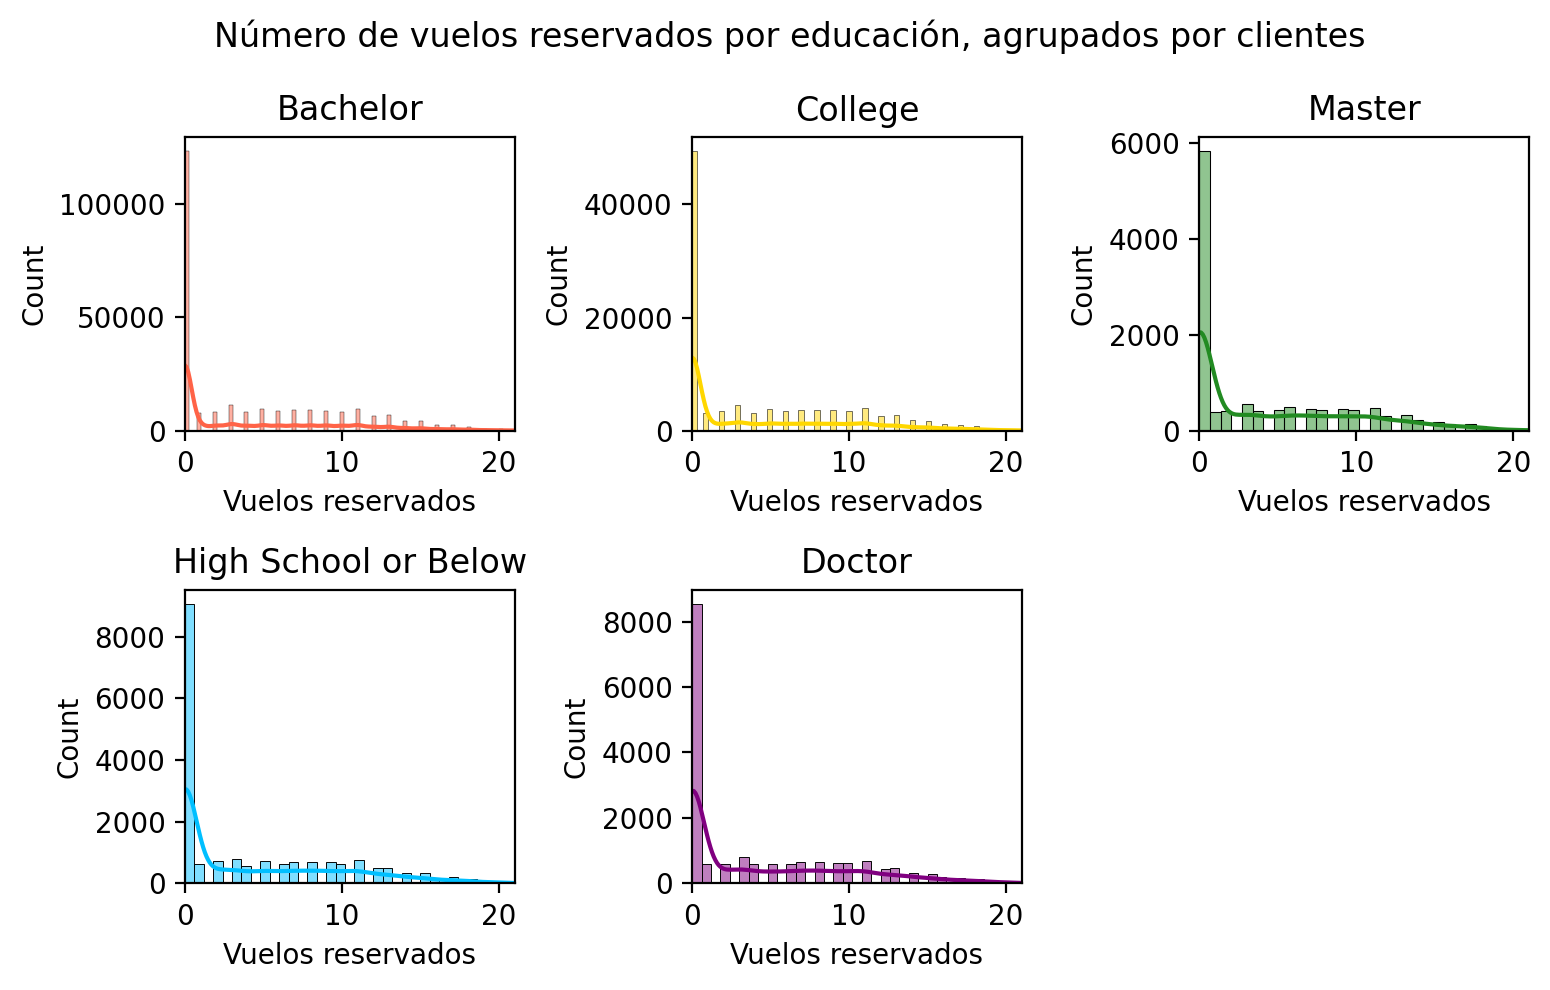

In [22]:
rows = 2
cols = 3

educations = df["education"].unique()
colors = ["tomato", "gold", "forestgreen", "deepskyblue", "purple"]

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (8,5), dpi = 200)
axes = axes.flat
plt.suptitle("Número de vuelos reservados por educación, agrupados por clientes")
for i in range(len(educations)):
    axes[i].set_title(educations[i])
    sns.histplot(data = df[df["education"] == educations[i]],
                  x = "flights_booked", ax=axes[i], color=colors[i], kde=True)
    axes[i].set_xlim(0,max(df["flights_booked"]))
    axes[i].set_xlabel("Vuelos reservados")
plt.tight_layout()

plt.delaxes(axes[-1])
plt.show()

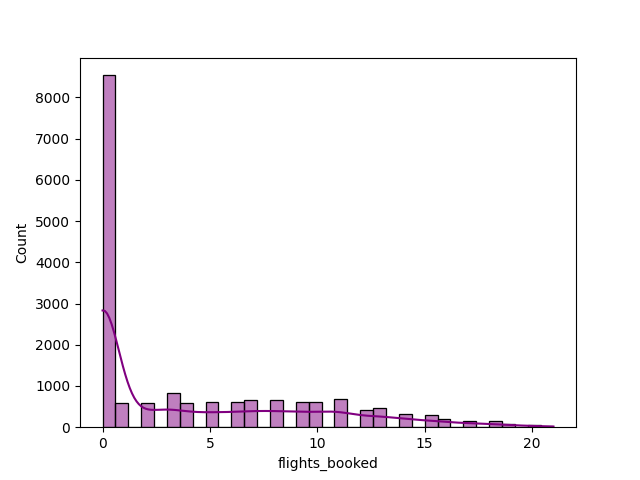

In [34]:
%matplotlib widget

plt.figure()
sns.histplot(data = df[df["education"] == educations[i]],
                x = "flights_booked", color=colors[i], kde=True)
plt.show()

In [24]:
df.groupby("education")["loyalty_number"].count()

education
Bachelor                252567
College                 102260
Doctor                   17731
High School or Below     18915
Master                   12287
Name: loyalty_number, dtype: int64

Ya que tratamos con muestras grandes, para comprobar normalidad usaremos un test de kolmogorov de comparación de distribuciones.

In [25]:
def test_norm(df, col, sig_level):
    media = np.mean(df[col])
    sd = np.std(df[col])
    normal = np.random.normal(loc = media, scale = sd, size = df[col].shape[0])   
    pval = stats.kstest(df[col], normal).pvalue
    if pval < sig_level:
        print("Se rechaza la hipotesis nula, no es normal.")
    elif pval > sig_level:
        print("No se rechaza la hipótesis nula, es normal.")
    return stats.kstest(df[col], normal)

In [26]:
dfs_educations = [df[df["education"] == edu] for edu in educations]
for dataframe in dfs_educations:
    test_norm(dataframe, "flights_booked", 0.05)

Se rechaza la hipotesis nula, no es normal.
Se rechaza la hipotesis nula, no es normal.
Se rechaza la hipotesis nula, no es normal.
Se rechaza la hipotesis nula, no es normal.
Se rechaza la hipotesis nula, no es normal.


Ninguna de las distribuciones es normal. Esto nos da paso a el uso de tests no paramétricos para igualdad de medianas.

In [27]:
def get_test(dep, *samples):
    if len(samples) > 2:
        print("More than 2 samples:")
        return stats.kruskal(*samples)
    elif len(samples) == 2:
        print("2 samples:")
        if dep:
            return stats.wilcoxon(*samples)
        else:
            return stats.mannwhitneyu(*samples)
    print("Necesitas al menos 2 muestras.")

In [28]:
get_test(False, dfs_educations[0]["flights_booked"],
          dfs_educations[1]["flights_booked"], dfs_educations[2]["flights_booked"], 
          dfs_educations[3]["flights_booked"], dfs_educations[4]["flights_booked"])

More than 2 samples:


KruskalResult(statistic=17.532618623121756, pvalue=0.0015225470219889365)

El test nos dice que al menos dos de nuestras muestras tienen medianas significativamente diferentes. ¿Cuáles?

In [29]:
df

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Manitoba,Winnipeg,Female,Bachelor,75049.0,Star,83325.38,Standard,2015,12,2018,8,0,0,0.0
405620,652627,Manitoba,Winnipeg,Female,Bachelor,75049.0,Star,83325.38,Standard,2015,12,2018,9,0,0,0.0
405621,652627,Manitoba,Winnipeg,Female,Bachelor,75049.0,Star,83325.38,Standard,2015,12,2018,10,0,0,0.0
405622,652627,Manitoba,Winnipeg,Female,Bachelor,75049.0,Star,83325.38,Standard,2015,12,2018,11,0,0,0.0


In [30]:
df.groupby("education")["flights_booked"].mean()

education
Bachelor                4.110288
College                 4.169744
Doctor                  4.175512
High School or Below    4.176209
Master                  4.200700
Name: flights_booked, dtype: float64

<Axes: ylabel='flights_booked'>

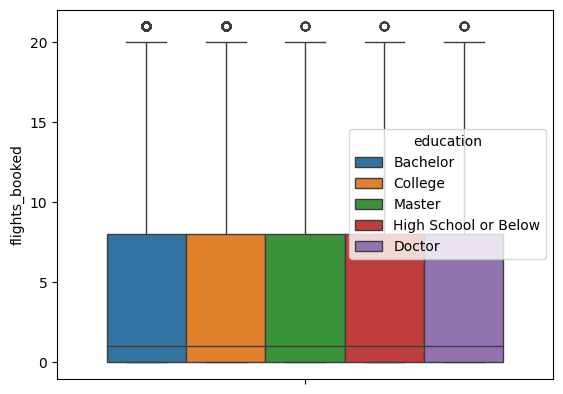

In [31]:
sns.boxplot(data = df[["education", "flights_booked"]], y = "flights_booked", hue = "education")

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones